# Analisis about the Bazilian commodities exportation 

Este notebook consiste em uma analise das exportações do mercado de commodites brazileiro 


In [1]:
import pandas as pd
#Tirar seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

load arquive

In [3]:
df = pd.read_csv('data_comexstat.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.05,"113,029.00"
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.00,"36,720.00"
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.20,180.00
3,1997-01-01,corn,GO,United States,Export,Sea,3.49,"5,688.00"
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.00,"18,630.00"


In [5]:
df['date'].describe()

count         117965
unique           276
top       2019-08-01
freq            1204
Name: date, dtype: object

In [6]:
type(df['date'][0])

str

Convert column data from string to date

In [7]:
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)

Calculating data since register to today

In [8]:
# Year difference
today = pd.to_datetime('today')
diff_y = today.year - df['date'].dt.year
df['year'] = df['date'].dt.year
b_md = df['date'].apply(lambda x: (x.month,x.day) )
no_date = b_md > (today.month,today.day)
df['since'] = diff_y - no_date

Getting last five years data with exportation register

In [93]:
exportationd_five_years = df[(df['type']=='Export') & (df['since']<=5)]

In [94]:
exportationd_five_years.head(10)

,date,product,state,country,type,route,tons,usd,year,since
78124,2015-06-01,corn,AC,Peru,Export,Ground,32.00,"8,531.00",2015,5
78125,2015-06-01,corn,GO,Colombia,Export,Sea,308.55,"782,370.00",2015,5
78126,2015-06-01,corn,GO,Mexico,Export,Air,0.16,910.00,2015,5
78127,2015-06-01,corn,GO,United States,Export,Sea,522.49,"1,429,481.00",2015,5
78128,2015-06-01,corn,MG,Guatemala,Export,Sea,19.84,"74,237.00",2015,5
78129,2015-06-01,corn,MS,Taiwan,Export,Sea,"62,010.00","10,799,662.00",2015,5
78130,2015-06-01,corn,MS,Vietnam,Export,Sea,"60,470.00","9,675,200.00",2015,5
78131,2015-06-01,corn,MT,Bolivia,Export,Other,113.50,"14,569.00",2015,5
78132,2015-06-01,corn,MT,Dominican Republic,Export,Sea,77.97,"24,821.00",2015,5
78133,2015-06-01,corn,MT,El Salvador,Export,Sea,49.44,"16,823.00",2015,5


Grupby each product

In [102]:
exportationd_five_years.columns

Index(['date', 'product', 'state', 'country', 'type', 'route', 'tons', 'usd',
       'year', 'since'],
      dtype='object')

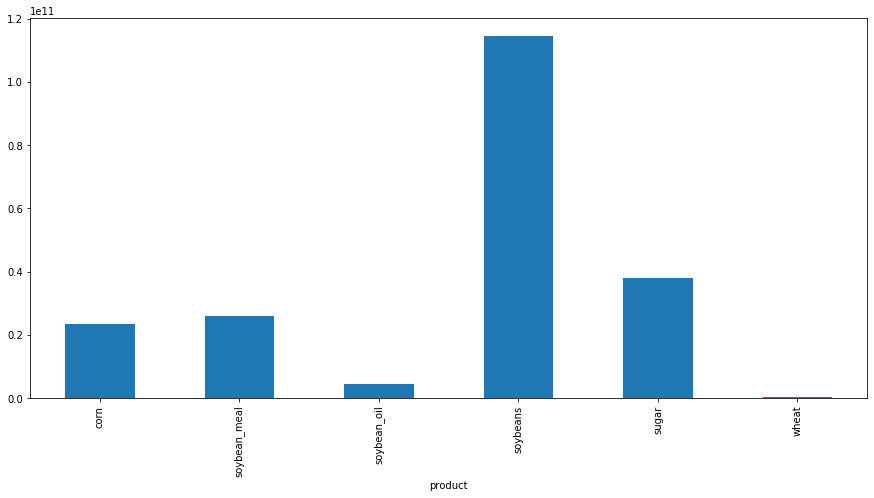

In [12]:
exportationd_five_years.groupby('product').sum()['usd'].plot.bar(figsize=(15,7));

we can observ that the biggest exportation in value is soybean with second place for sugar

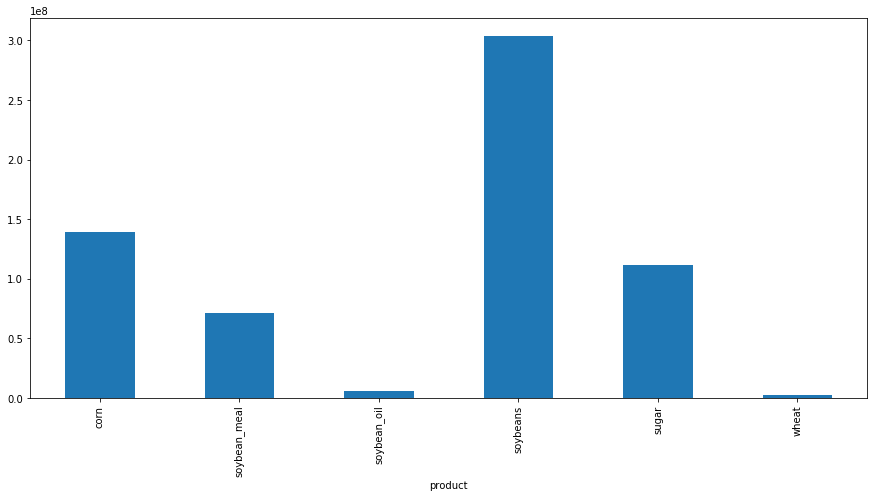

In [13]:
exportationd_five_years.groupby('product').sum()['tons'].plot.bar(figsize=(15,7));

When we look in volume, the soybean is the first too, but corn is the second, it suggests that the selling value about corn is less than soy meal

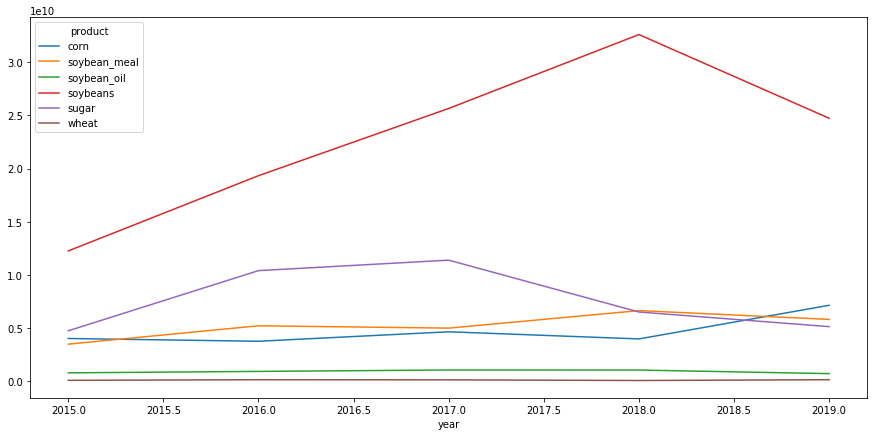

In [14]:
fig, ax = plt.subplots(figsize=(15,7))

exportationd_five_years.groupby(['year','product']).sum()['usd'].unstack().plot(ax=ax)

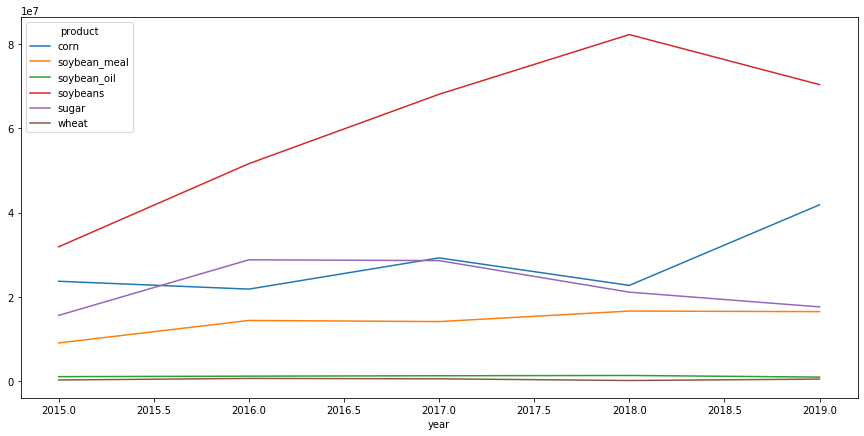

In [15]:
fig, ax = plt.subplots(figsize=(15,7))

exportationd_five_years.groupby(['year','product']).sum()['tons'].unstack().plot(ax=ax)

By observing the volume and value graphs, we observed a decrease in the volume of soybeans traded and the value in, with the fall in value being more pronounced than the volume, indicating a fall in value in the market. volume increasing much faster than value, indicating that greater market trading is not being accompanied by value.

In [16]:
exportationd_five_years_soy_corn = df[(df['type']=='Export') & (df['since']<=5)]
exportationd_five_years_soy_corn = exportationd_five_years_soy_corn[(exportationd_five_years_soy_corn['product']=='corn') | (exportationd_five_years_soy_corn['product']=='soybeans')]


In [17]:
exportationd_five_years_soy_corn

,date,product,state,country,type,route,tons,usd,year,since
78124,2015-06-01,corn,AC,Peru,Export,Ground,32.00,"8,531.00",2015,5
78125,2015-06-01,corn,GO,Colombia,Export,Sea,308.55,"782,370.00",2015,5
78126,2015-06-01,corn,GO,Mexico,Export,Air,0.16,910.00,2015,5
78127,2015-06-01,corn,GO,United States,Export,Sea,522.49,"1,429,481.00",2015,5
78128,2015-06-01,corn,MG,Guatemala,Export,Sea,19.84,"74,237.00",2015,5
...,...,...,...,...,...,...,...,...,...,...
117584,2019-12-01,soybeans,SP,Liberia,Export,Other,0.00,11.00,2019,1
117585,2019-12-01,soybeans,SP,Liberia,Export,Other,0.01,30.00,2019,1
117586,2019-12-01,soybeans,SP,Thailand,Export,Sea,146.50,"52,813.00",2019,1
117587,2019-12-01,soybeans,TO,China,Export,Sea,"63,731.48","22,986,541.00",2019,1


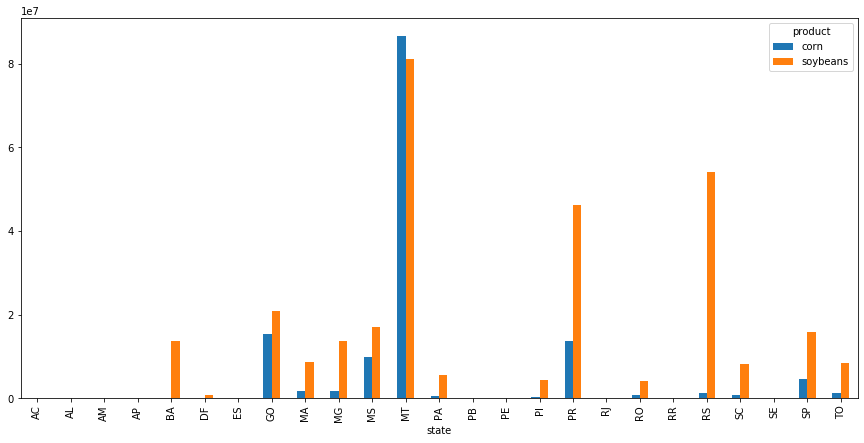

In [18]:
exportationd_five_years_soy_corn.groupby(["state","product"]).sum()['tons'].unstack().plot.bar(figsize=(15,7));

Quando observamos o volume negociado por estado, verificamos que o maior produtor de soja do Brasil é o Mato Grosso, seguido pelo Rio Grande do Sul, tendencia essa que não ocorre com milho, onde o mato grosso tambem é o maior produtor, mas o segundo é Goias. 

In [19]:
exportationd_five_years_soy= exportationd_five_years_soy_corn[exportationd_five_years_soy_corn['product']=='soybeans']

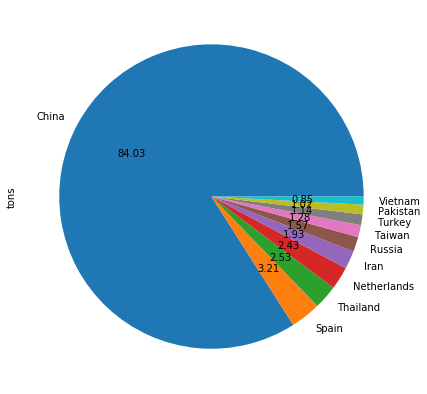

In [20]:
exportationd_five_years_soy.groupby(['country']).sum()['tons'].sort_values(ascending=False).head(10).plot.pie(figsize=(15,7),autopct="%.2f");

Quando observamos o grafico de exportações apenas de soja nos ultimos 5 anos, entendemos que a China é disparado o maior comprador do Brasil representando 84.03%, tornando invivel a comparação com outros paises em um unico grafico como abaixo.   

In [21]:
exportationd_five_years_soy.groupby(['country','year']).sum()['tons'].sort_values(ascending=False).head(20)

country      year
China        2018   67,547,214.21
             2019   54,411,695.23
             2017   53,733,446.81
             2016   38,563,909.13
             2015   23,897,292.37
Spain        2019    2,182,822.98
             2017    2,016,854.28
             2018    1,889,039.45
Thailand     2019    1,653,241.70
             2017    1,652,845.82
Netherlands  2019    1,622,188.20
Spain        2016    1,621,691.01
Thailand     2016    1,531,615.99
Iran         2019    1,525,906.51
Netherlands  2017    1,517,003.82
             2016    1,490,261.46
Spain        2015    1,399,456.59
Netherlands  2018    1,305,698.16
Turkey       2019    1,299,684.77
Iran         2018    1,297,633.87
Name: tons, dtype: float64

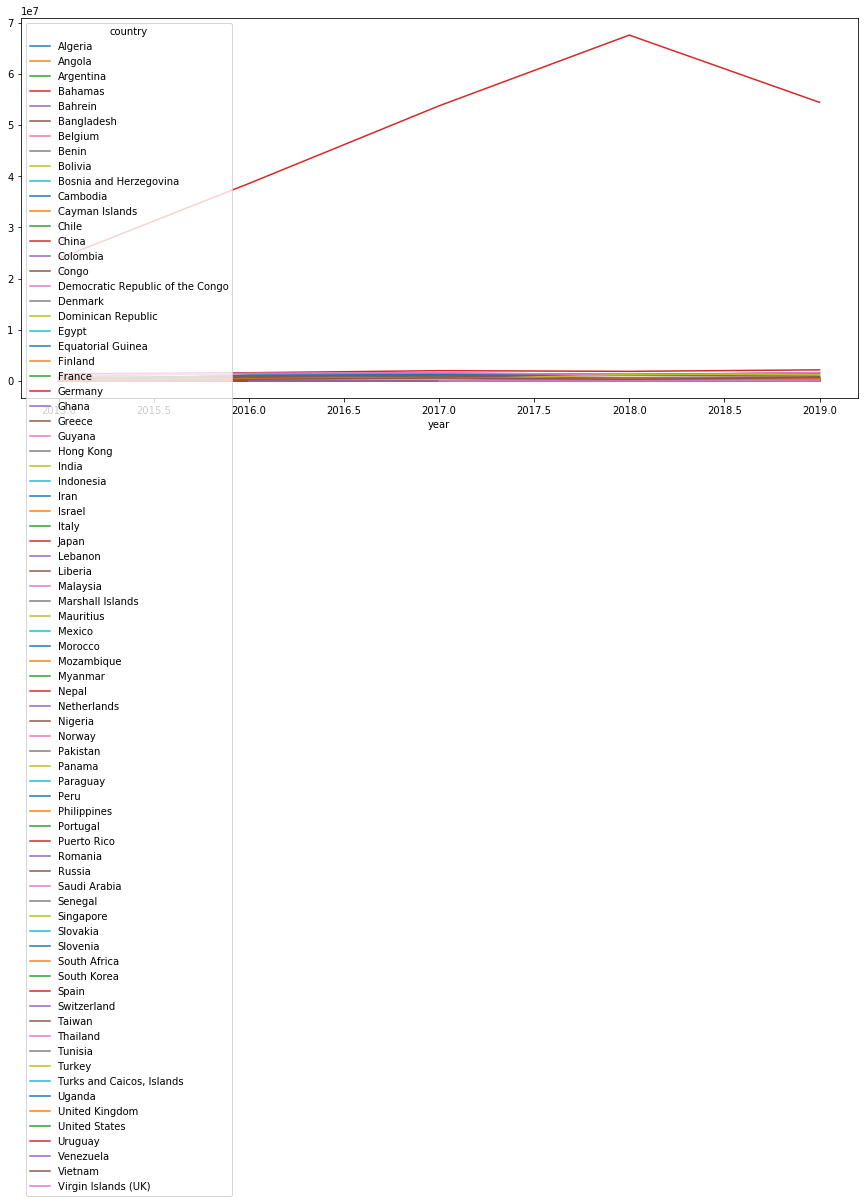

In [22]:
exportationd_five_years_soy.groupby(['country','year']).sum()['tons'].unstack('country').plot(kind='line',figsize=(15,7))

Não conseguimos vizualizar muito alem da China nesse gráfico, mas explicitamente obeservamos uma diminuição das compras deles da soja Brasileira, trazendo uma necessidade em aberta nessa analise de entender porque e como substituir essas vendas para o Brazil não perder mercado.    

In [23]:
exportationd_five_years_soy_top = exportationd_five_years_soy.groupby(['country','year']).sum()['tons'].sort_values(ascending=False).iloc[5:].head(50)

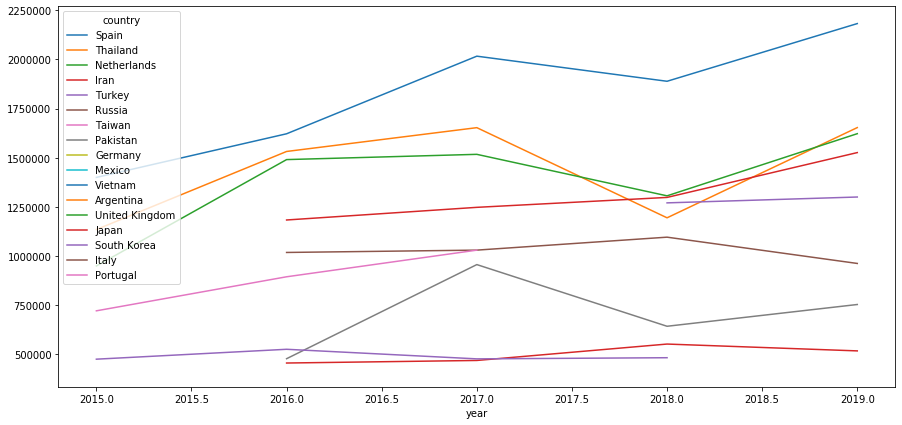

In [24]:
#fig, ax = plt.subplots(figsize=(15,7))


exportationd_five_years_soy_top.unstack('country').plot(kind='line',figsize=(15,7))

Ao retirarmos a china para entender comos os outros parceiros se comportam, observamos que a espanha vem em segundo seguido pela Thailandia, ambos em crescimento nos ultimos anos.

Para enriquecer essa análise, foi utilizada a base de dados extraida do data.worldbank.org

In [26]:
df_countries_pop = pd.read_csv('API_SP_POP_TOTL_DS2_en_csv_v2_2252106.csv',sep = ',')

In [27]:
df_countries_pop = df_countries_pop[['Country Name','2015','2016','2017','2018','2019']]

In [65]:
df_countries_pop.sort_values(by=['2019'],ascending=False).head(50)

,Country Name,2015,2016,2017,2018,2019
257,World,"7,338,964,954.00","7,424,286,143.00","7,509,074,479.00","7,591,945,270.50","7,673,533,974.00"
101,IDA & IBRD total,"6,176,134,809.00","6,254,597,843.00","6,333,386,949.00","6,410,738,779.50","6,486,934,853.00"
138,Low & middle income,"6,126,712,584.00","6,205,233,900.00","6,284,043,441.00","6,361,429,560.50","6,437,681,136.00"
154,Middle income,"5,523,478,043.00","5,586,453,059.00","5,649,246,749.00","5,710,101,973.50","5,769,226,171.00"
100,IBRD only,"4,648,915,921.00","4,692,793,113.00","4,736,170,185.00","4,777,257,264.50","4,816,235,953.00"
60,Early-demographic dividend,"3,122,156,905.00","3,164,386,912.00","3,206,361,028.00","3,248,239,444.00","3,290,290,613.00"
137,Lower middle income,"2,749,824,313.00","2,790,617,792.00","2,831,466,703.00","2,872,397,765.00","2,913,363,391.00"
247,Upper middle income,"2,773,653,730.00","2,795,835,267.00","2,817,780,046.00","2,837,704,208.50","2,855,862,780.00"
61,East Asia & Pacific,"2,282,855,831.00","2,298,486,142.00","2,314,097,713.00","2,328,138,066.00","2,340,628,292.00"
140,Late-demographic dividend,"2,247,409,050.00","2,261,412,980.00","2,275,534,160.00","2,287,846,154.50","2,298,470,832.00"


In [29]:
exportationd_five_years_soy=exportationd_five_years_soy.groupby(['country','year']).sum()['tons'].sort_values(ascending=False).head(20).to_frame()

In [30]:
exportationd_five_years_soy['pop'] = 0

In [31]:
exportationd_five_years_soy.index.names

FrozenList(['country', 'year'])

In [32]:
exportationd_five_years_soy.reset_index()

,country,year,tons,pop
0,China,2018,"67,547,214.21",0
1,China,2019,"54,411,695.23",0
2,China,2017,"53,733,446.81",0
3,China,2016,"38,563,909.13",0
4,China,2015,"23,897,292.37",0
5,Spain,2019,"2,182,822.98",0
6,Spain,2017,"2,016,854.28",0
7,Spain,2018,"1,889,039.45",0
8,Thailand,2019,"1,653,241.70",0
9,Thailand,2017,"1,652,845.82",0


bug do iran

In [33]:
df_countries_pop[df_countries_pop['Country Name']=="Iran"]['2018'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [49]:
for country,year in exportationd_five_years_soy.index.to_list():
    #print(country)
    if df_countries_pop[df_countries_pop['Country Name']==country][str(year)].values:
        exportationd_five_years_soy.loc[(country,year),'pop'] = df_countries_pop[df_countries_pop['Country Name']==country][str(year)].values[0]
        exportationd_five_years_soy.loc[(country,year),'tons_pop'] = exportationd_five_years_soy.loc[(country,year)].tons/exportationd_five_years_soy.loc[(country,year)]['pop']
    else:
        exportationd_five_years_soy.loc[(country,year),'pop']=0
        
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  This is separate from the ipykernel package so we can avoid doing imports until


Cabe ressaltar que não pudemos analisar as relações soja população com o Iran visto que esse não estava indicado na base utilizadada para extrair a população mundial. 

In [52]:
exportationd_five_years_soy

tons              pop  tons_pop
country     year                                         
China       2018 67,547,214.21 1,392,730,000.00      0.05
            2019 54,411,695.23 1,397,715,000.00      0.04
            2017 53,733,446.81 1,386,395,000.00      0.04
            2016 38,563,909.13 1,378,665,000.00      0.03
            2015 23,897,292.37 1,371,220,000.00      0.02
Spain       2019  2,182,822.98    47,076,781.00      0.05
            2017  2,016,854.28    46,593,236.00      0.04
            2018  1,889,039.45    46,797,754.00      0.04
Thailand    2019  1,653,241.70    69,625,582.00      0.02
            2017  1,652,845.82    69,209,858.00      0.02
Netherlands 2019  1,622,188.20    17,332,850.00      0.09
Spain       2016  1,621,691.01    46,484,062.00      0.03
Thailand    2016  1,531,615.99    68,971,331.00      0.02
Iran        2019  1,525,906.51             0.00       nan
Netherlands 2017  1,517,003.82    17,131,296.00      0.09
            2016  1,490,261.46    17,030,314.00      0.09
Spain       2015  1,399,456.59    46,444,832.00      0.03
Netherlands 2018  1,305,698.16    17,231,624.00      0.08
Turkey      2019  1,299,684.77    83,429,615.00      0.02
Iran        2018  1,297,633.87             0.00       nan

Verificando a população e a proporção de volume de exportação VS tamanho da população, verificamos que o Brasil tem varios outros paises que podem comprar sua soja, como india, pakistão, indeonésia, levando em consideração apenas população, obviamente para a absorção deveriamos levar em consideração também PIP desses paises, base de alimentação, PIP percapto e outroas que não cabem a essa curta análise. Entretanto cabe ressaltar que mesmo dentro dos parceiros já consolidados, com grande população e baixo território, ainda existe possibilidade de aumentar a exportação, visto numeros já lacançados como China e Espanha.  

In [25]:
exportationd_five_years_soy.groupby(['route']).sum()['tons']

route
Air               50.67
Ground        97,810.74
Other      1,519,020.84
River      7,898,369.68
Sea      294,398,894.64
Name: tons, dtype: float64

Ao verificarmos os principais modais de exportação brasileiro, em disparado por mar é o maior, indicando a importnância dos portos brasileiros.

In [66]:
exportationd_five_years_corn= exportationd_five_years_soy_corn[exportationd_five_years_soy_corn['product']=='corn']

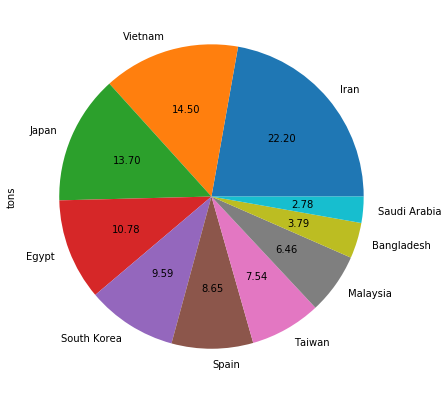

In [75]:
exportationd_five_years_corn.groupby(['country']).sum()['tons'].sort_values(ascending=False).head(10).plot.pie(figsize=(15,7),autopct="%.2f");

Ao contrario da Soja, ao analisarmos as exportações de milho, verificamos uma distribuição muito mais homogênea entre diversos pareceiros comerciais.  

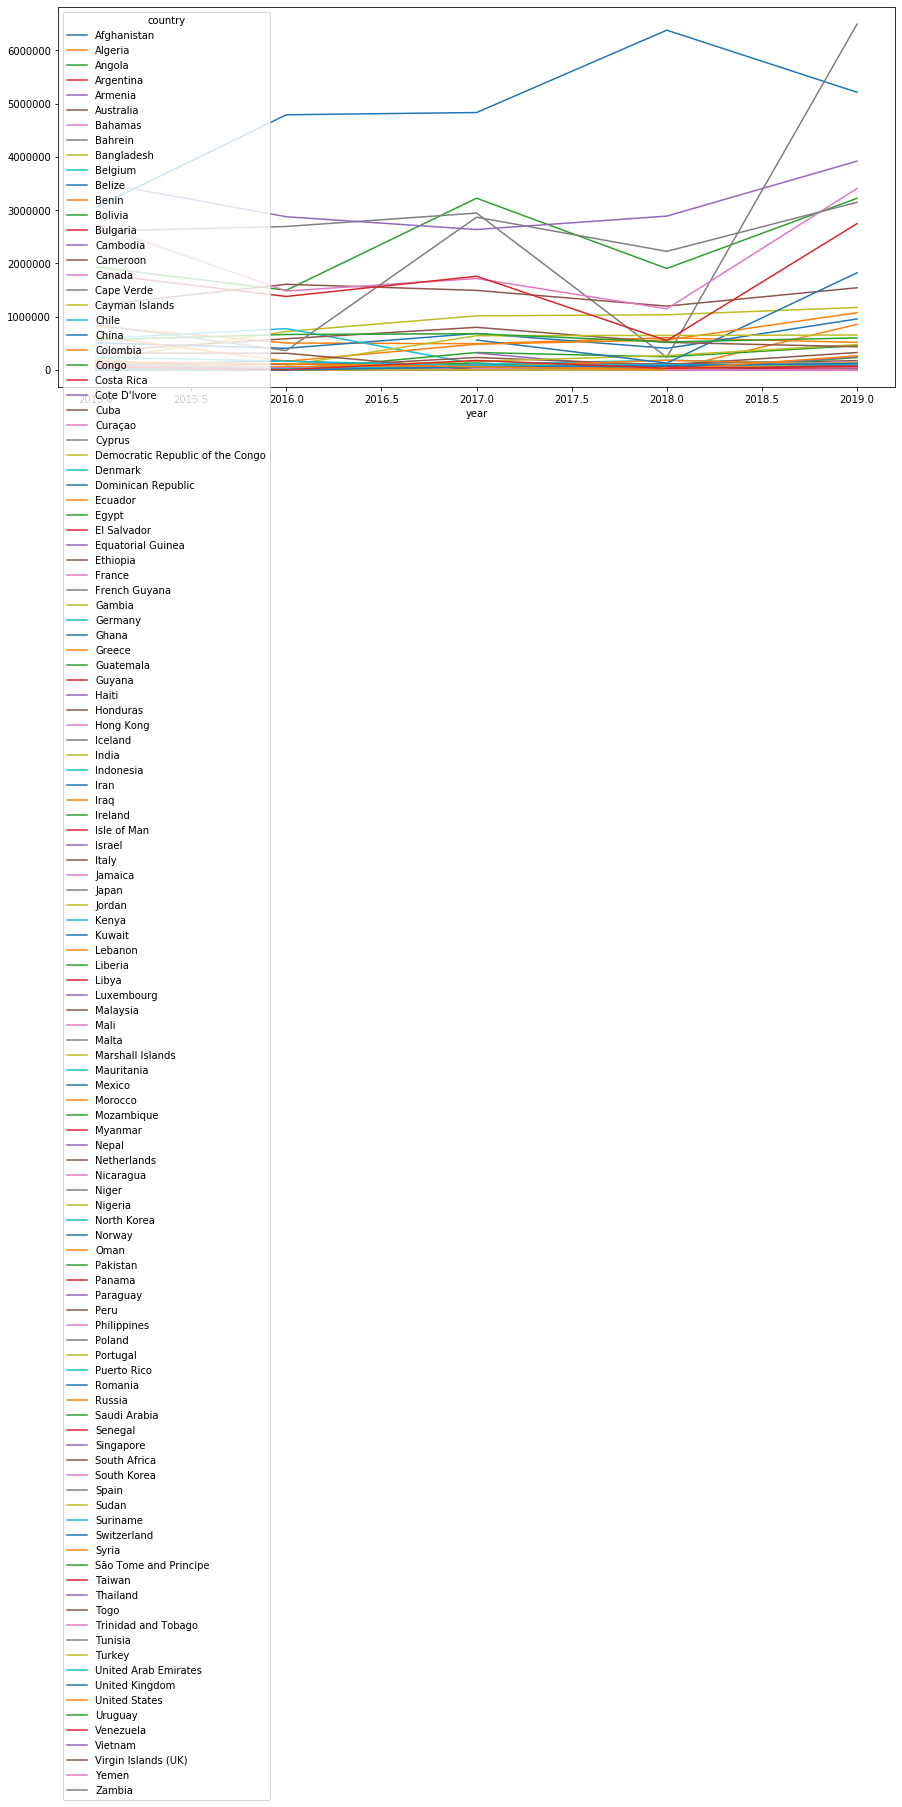

In [77]:
exportationd_five_years_corn.groupby(['country','year']).sum()['tons'].unstack('country').plot(kind='line',figsize=(15,7))

In [87]:
exportationd_five_years_corn_top = exportationd_five_years_corn.groupby(['country','year']).sum()['tons'].sort_values(ascending=False).head(40)

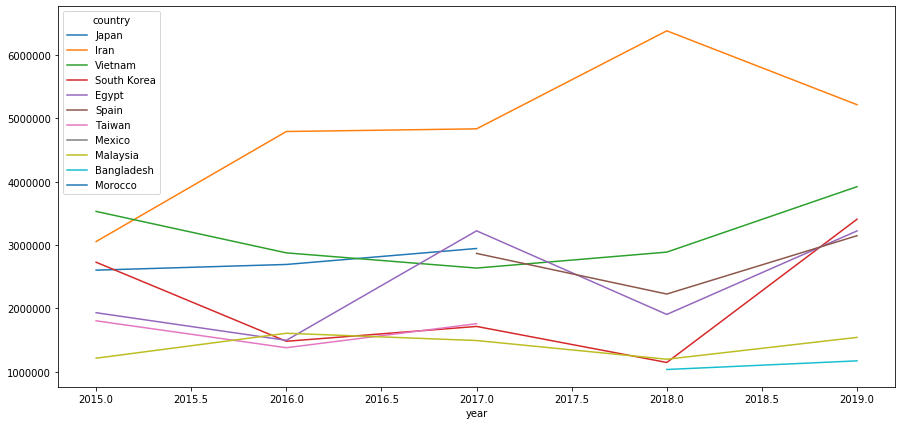

In [88]:
exportationd_five_years_corn_top.unstack('country').plot(kind='line',figsize=(15,7))

Ainda verificamos crescimento subastancial nos parceiros comerciais, muitos com alta densidade populacional, indicando ainda grnade potrncial de crescimento.  

In [89]:
exportationd_five_years_corn.groupby(['route']).sum()['tons']

route
Air           10,139.05
Ground        69,269.00
Other        265,084.21
River      5,679,519.64
Sea      133,399,048.31
Name: tons, dtype: float64

Assim como a soja o milho tambem tem como seu maior modal de exportação o mar, seguido pelos rios 